# Convolutional Neural Networks

## Project: Write an Algorithm for Landmark Classification

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to HTML, all the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.

---
### Why We're Here

Photo sharing and photo storage services like to have location data for each photo that is uploaded. With the location data, these services can build advanced features, such as automatic suggestion of relevant tags or automatic photo organization, which help provide a compelling user experience. Although a photo's location can often be obtained by looking at the photo's metadata, many photos uploaded to these services will not have location metadata available. This can happen when, for example, the camera capturing the picture does not have GPS or if a photo's metadata is scrubbed due to privacy concerns.

If no location metadata for an image is available, one way to infer the location is to detect and classify a discernible landmark in the image. Given the large number of landmarks across the world and the immense volume of images that are uploaded to photo sharing services, using human judgement to classify these landmarks would not be feasible.

In this notebook, you will take the first steps towards addressing this problem by building models to automatically predict the location of the image based on any landmarks depicted in the image. At the end of this project, your code will accept any user-supplied image as input and suggest the top k most relevant landmarks from 50 possible landmarks from across the world. The image below displays a potential sample output of your finished project.

![Sample landmark classification output](images/sample_landmark_output.png)


### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Download Datasets and Install Python Modules
* [Step 1](#step1): Create a CNN to Classify Landmarks (from Scratch)
* [Step 2](#step2): Create a CNN to Classify Landmarks (using Transfer Learning)
* [Step 3](#step3): Write Your Landmark Prediction Algorithm

---
<a id='step0'></a>
## Step 0: Download Datasets and Install Python Modules

**Note: if you are using the Udacity workspace, *YOU CAN SKIP THIS STEP*. The dataset can be found in the `/data` folder and all required Python modules have been installed in the workspace.**

Download the [landmark dataset](https://udacity-dlnfd.s3-us-west-1.amazonaws.com/datasets/landmark_images.zip).
Unzip the folder and place it in this project's home directory, at the location `/landmark_images`.

Install the following Python modules:
* cv2
* matplotlib
* numpy
* PIL
* torch
* torchvision

In [ ]:
conda install opencv

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Nina\anaconda3

  added / updated specs:
    - opencv


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    libopencv-4.0.1            |       hbb9e17c_0        28.6 MB
    opencv-4.0.1               |   py38h2a7c758_0          22 KB
    py-opencv-4.0.1            |   py38he44ac1e_0         1.5 MB
    ------------------------------------------------------------
                                           Total:        30.1 MB

The following NEW packages will be INSTALLED:

  libopencv          pkgs/main/win-64::libopencv-4.0.1-hbb9e17c_0
  opencv             pkgs/main/win-64::opencv-4.0.1-py38h2a7c758_0
  py-opencv          pkgs/main/win-64::py-opencv-4.0.1-py38he44ac1e_0




opencv-4.0.1         | 22 KB     |            |   0% 
opencv-4.0.1         | 22 KB     | #######4   |  74% 
opencv-4.0.1      

In [ ]:
conda install torchvision -c pytorch

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Nina\anaconda3

  added / updated specs:
    - torchvision


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    cudatoolkit-10.1.243       |       h74a9793_0       300.3 MB
    torchvision-0.5.0          |       py38_cu101         6.3 MB  pytorch
    ------------------------------------------------------------
                                           Total:       306.7 MB

The following NEW packages will be INSTALLED:

  cudatoolkit        pkgs/main/win-64::cudatoolkit-10.1.243-h74a9793_0
  torchvision        pytorch/win-64::torchvision-0.5.0-py38_cu101




torchvision-0.5.0    | 6.3 MB    |            |   0% 
torchvision-0.5.0    | 6.3 MB    |            |   0% 
torchvision-0.5.0    | 6.3 MB    |            |   1% 
torchvision-0.5.0    | 6.3 MB    | 2          |   3% 
torchvision-0.5.0    | 6.3 

cudatoolkit-10.1.243 | 300.3 MB  | ######1    |  62% 
cudatoolkit-10.1.243 | 300.3 MB  | ######1    |  62% 
cudatoolkit-10.1.243 | 300.3 MB  | ######2    |  62% 
cudatoolkit-10.1.243 | 300.3 MB  | ######2    |  62% 
cudatoolkit-10.1.243 | 300.3 MB  | ######2    |  63% 
cudatoolkit-10.1.243 | 300.3 MB  | ######2    |  63% 
cudatoolkit-10.1.243 | 300.3 MB  | ######3    |  63% 
cudatoolkit-10.1.243 | 300.3 MB  | ######3    |  63% 
cudatoolkit-10.1.243 | 300.3 MB  | ######3    |  64% 
cudatoolkit-10.1.243 | 300.3 MB  | ######3    |  64% 
cudatoolkit-10.1.243 | 300.3 MB  | ######4    |  64% 
cudatoolkit-10.1.243 | 300.3 MB  | ######4    |  64% 
cudatoolkit-10.1.243 | 300.3 MB  | ######4    |  65% 
cudatoolkit-10.1.243 | 300.3 MB  | ######4    |  65% 
cudatoolkit-10.1.243 | 300.3 MB  | ######4    |  65% 
cudatoolkit-10.1.243 | 300.3 MB  | ######5    |  65% 
cudatoolkit-10.1.243 | 300.3 MB  | ######5    |  65% 
cudatoolkit-10.1.243 | 300.3 MB  | ######5    |  66% 
cudatoolkit-10.1.243 | 300.3

In [1]:
import os
import cv2
import pandas as pd
from PIL import Image
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import random
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data import Dataset


print(torch.__version__)
%matplotlib inline

1.10.0+cu111


---

<a id='step1'></a>
## Step 1: Create a CNN to Classify Landmarks (from Scratch)

In this step, you will create a CNN that classifies landmarks.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 20%.

Although 20% may seem low at first glance, it seems more reasonable after realizing how difficult of a problem this is. Many times, an image that is taken at a landmark captures a fairly mundane image of an animal or plant, like in the following picture.

<img src="images/train/00.Haleakala_National_Park/084c2aa50d0a9249.jpg" alt="Bird in Haleakalā National Park" style="width: 400px;"/>

Just by looking at that image alone, would you have been able to guess that it was taken at the Haleakalā National Park in Hawaii?

An accuracy of 20% is significantly better than random guessing, which would provide an accuracy of just 2%. In Step 2 of this notebook, you will have the opportunity to greatly improve accuracy by using transfer learning to create a CNN.

Remember that practice is far ahead of theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Landmark Dataset

Use the code cell below to create three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader): one for training data, one for validation data, and one for test data. Randomly split the images located at `landmark_images/train` to create the train and validation data loaders, and use the images located at `landmark_images/test` to create the test data loader.

All three of your data loaders should be accessible via a dictionary named `loaders_scratch`. Your train data loader should be at `loaders_scratch['train']`, your validation data loader should be at `loaders_scratch['valid']`, and your test data loader should be at `loaders_scratch['test']`.

You may find [this documentation on custom datasets](https://pytorch.org/docs/stable/torchvision/datasets.html#datasetfolder) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [2]:
# create a Dataset object, split and return another Dataset object with the same transforms attribute

class SubsetDataSet(Dataset):
    def __init__(self, subset, transform=None):
        self.subset = subset
        self.transform = transform
        
    def __getitem__(self, index):
        x, y = self.subset[index]
        if self.transform:
            x = self.transform(x)
        return x, y
        
    def __len__(self):
        return len(self.subset)

# https://discuss.pytorch.org/t/torch-utils-data-dataset-random-split/32209

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [4]:
#Parameters
num_workers = 0
batch_size = 32
#data_dir = 'C:/Users/Nina/Documents/Onlinekurse/Udacity/DeepLearning/nd101-c2-landmarks-starter/landmark_project/landmark_images'
#dir_train = os.path.join(data_dir, 'train\\')
#dir_test = os.path.join(data_dir, 'test\\')
dir_train = "/content/drive/MyDrive/landmark_images/train"
dir_test = "/content/drive/MyDrive/landmark_images/test"

mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])
image_size = 224
random_rotation = (-30, 30)
random_translate = (0.2, 0.3)
random_scale = (1, 2)
random_shear = (-15, 15)

In [5]:
### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes
image_transforms = {
    'train':  transforms.Compose([
        transforms.RandomResizedCrop(image_size),
        transforms.RandomAffine(degrees=random_rotation, translate=random_translate, scale=random_scale, shear=random_shear),
        transforms.RandomHorizontalFlip(p=0.3),
        transforms.RandomVerticalFlip(p=0.3),
        transforms.RandomGrayscale(p=0.3),
        transforms.ToTensor(),
        transforms.Normalize(mean,std)
    ]),
    'valid':  transforms.Compose([
        transforms.CenterCrop((image_size, image_size)),
        transforms.ToTensor(),
        transforms.Normalize(mean,std)
    ]),
    'test':  transforms.Compose([
        transforms.CenterCrop((image_size, image_size)),
        transforms.ToTensor(),
        transforms.Normalize(mean,std)
    ])
}

dataset = datasets.ImageFolder(dir_train)
train_size = int(len(dataset)*0.75)
valid_size = int(len(dataset)) - train_size 

train_split, valid_split, = torch.utils.data.random_split(dataset, [train_size, valid_size])



train_dataset = SubsetDataSet(train_split, transform=image_transforms["train"])
valid_dataset = SubsetDataSet(valid_split, transform=image_transforms["valid"])
test_dataset = datasets.ImageFolder(dir_test, transform=image_transforms["test"])


trainLoader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=num_workers)
validLoader = torch.utils.data.DataLoader(valid_dataset, batch_size=batch_size, shuffle=True, num_workers=num_workers)
testLoader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=num_workers)

loaders_scratch = {
    'train': trainLoader,
    'valid': validLoader,
    'test': testLoader
}



In [7]:
print('Number of Training Images: ', len(train_dataset))
print('Number of Test Images: ', len(test_dataset))
print('Number of Validation Images: ', len(valid_dataset))


Number of Training Images:  3747
Number of Test Images:  1250
Number of Validation Images:  1249


**Question 1:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?

**Answer**: 



*  In accordance to the VGG-16 pretained network which I will use for transfer learning later one, resized all images by cropping them in 224*224 dimensions.
The training data and validation data is only resized and normalized. The values for normalization came from ImageNet. 

*  In order to allow for better generalization, I decided to augment the dataset by rotating the picture, horizontally and vertically flipping the picture and by randomly using a grayscale.




### (IMPLEMENTATION) Visualize a Batch of Training Data

Use the code cell below to retrieve a batch of images from your train data loader, display at least 5 images simultaneously, and label each displayed image with its class name (e.g., "Golden Gate Bridge").

Visualizing the output of your data loader is a great way to ensure that your data loading and preprocessing are working as expected.

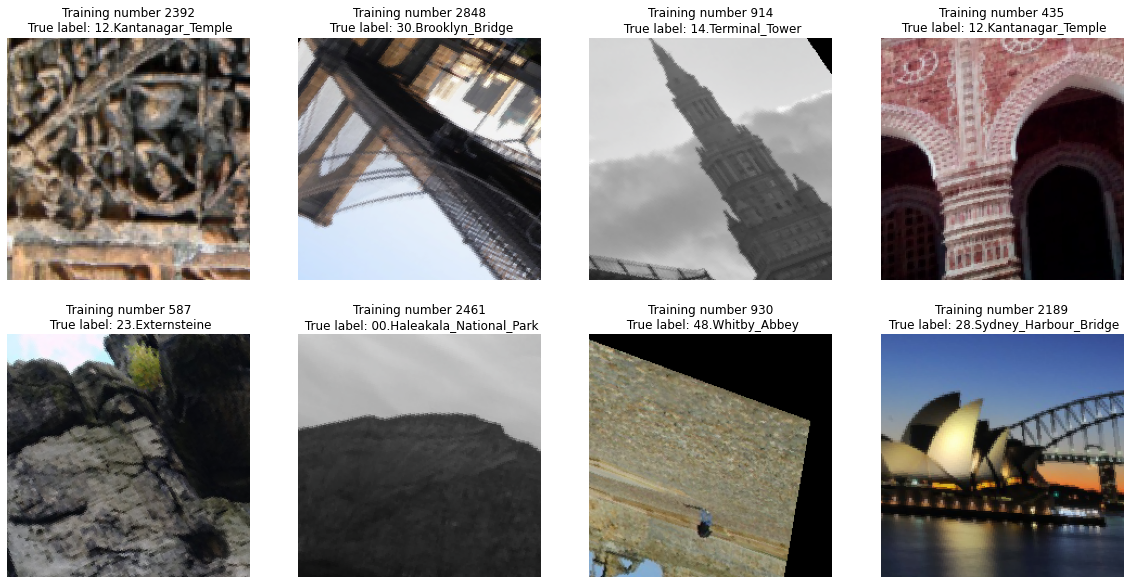

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

## TODO: visualize a batch of the train data loader

## the class names can be accessed at the `classes` attribute
## of your dataset object (e.g., `train_dataset.classes`)

    
fig = plt.figure(figsize=(20, 10))
for i in range(1,9):
    selected_image = random.randint(0, len(train_dataset))
    fig.add_subplot(2, 4, i)
    img = train_dataset[selected_image][0] * std[:, None, None] + mean[:, None, None]
    # Clip the image pixel values
    img = np.clip(img, 0, 1)
    plt.imshow(np.transpose(img.numpy(), (1, 2, 0)))
    plt.title('Training number {}\n True label: {}'.format(selected_image, dataset.classes[train_dataset[selected_image][1]]))
    plt.axis('off')
    
plt.show()

### Initialize use_cuda variable

In [7]:
# useful variable that tells us whether we should use the GPU
use_cuda = torch.cuda.is_available()

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and fill in the function `get_optimizer_scratch` below.

In [9]:
criterion_scratch = nn.CrossEntropyLoss()

def get_optimizer_scratch(model):
    ## TODO: select and return an optimizer
    optimizer = optim.SGD(model.parameters(), lr=0.01)
    return optimizer
    
    

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify images of landmarks.  Use the template in the code cell below.

In [11]:


# define the CNN architecture
class Net(nn.Module):
    ## TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1)
        
        
        self.pool = nn.MaxPool2d(2, 2)
        
        self.fc1 = nn.Linear( 28 * 32* 64, 256)
        self.fc2 = nn.Linear(256, 50)
    
        self.dropout = nn.Dropout(0.3)
        
        # Activation function
        #self.leaky_relu = nn.LeakyReLU(negative_slope=0.2)
        
        
    
    def forward(self, x):
        ## Define forward behavior

        x = self.pool(nn.LeakyReLU(self.conv1(x), negative_slope=0.2))
        x = self.pool(nn.LeakyReLU(self.conv1(x), negative_slope=0.2))
        x = self.pool(nn.LeakyReLU(self.conv1(x), negative_slope=0.2))
        
        # flatten the image
        x = x.view(-1, 28 * 32 * 64) 
        
        # dropout layer
        x = self.dropout(x)
        
        # 1st hidden layer
        x = nn.LeakyReLU(self.fc1(x), negative_slope=0.2)
        
        # dropout layer
        x = self.dropout(x)
        
        # final layer
        x = self.fc2(x)
        
        return x

In [12]:
model_scratch

Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=50176, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=50, bias=True)
  (dropout): Dropout(p=0.3, inplace=False)
  (leaky_relu): LeakyReLU(negative_slope=0.2)
  (batch_norm2d): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batch_norm1d): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)

__Question 2:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__  I first started with 5 convolutional layers but then found out that 3 layers are also satisfying. Every convolutional layer is followed by a max pooling layer for reducing the features. The model finally consists of 2 fully connected layers for decreasing the output to 50 classes.
In order to avoid overfitting, I included a dropout rate 0f 0.3 so that during each training epoch 30 percent of the neurons are randomly not considered. 



### (IMPLEMENTATION) Implement the Training Algorithm

Implement your training algorithm in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at the filepath stored in the variable `save_path`.

In [13]:
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        # set the module to training mode
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()

            ## TODO: find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data.item() - train_loss))
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))

            
            

        ######################    
        # validate the model #
        ######################
        # set the model to evaluation mode
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()

            ## TODO: update average validation loss 
            output = model(data)
            loss = criterion(output, target)
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))

            
            

        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))

        ## TODO: if the validation loss has decreased, save the model at the filepath stored in save_path
        if valid_loss < valid_loss_min:
            print('Validation loss decrease of {:.9f} <<<'.format(valid_loss_min - valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss

        
        
    return model

### (IMPLEMENTATION) Experiment with the Weight Initialization

Use the code cell below to define a custom weight initialization, and then train with your weight initialization for a few epochs. Make sure that neither the training loss nor validation loss is `nan`.

Later on, you will be able to see how this compares to training with PyTorch's default weight initialization.

In [14]:
def custom_weight_init(m):
    classname = m.__class__.__name__
    # for every Linear layer in a model..
    if classname.find('Linear') != -1:
        # get the number of the inputs
        n = m.in_features
        y = 1.0/np.sqrt(n)
        m.weight.data.uniform_(-y, y)
        m.bias.data.fill_(0)

    
#-#-# Do NOT modify the code below this line. #-#-#
    
model_scratch.apply(custom_weight_init)
model_scratch = train(20, loaders_scratch, model_scratch, get_optimizer_scratch(model_scratch),
                      criterion_scratch, use_cuda, 'ignore.pt')

Epoch: 1 	Training Loss: 3.868752 	Validation Loss: 3.787888
Validation loss decrease of inf <<<
Epoch: 2 	Training Loss: 3.741100 	Validation Loss: 3.607445
Validation loss decrease of 0.180443048 <<<
Epoch: 3 	Training Loss: 3.699820 	Validation Loss: 3.906250
Epoch: 4 	Training Loss: 3.658966 	Validation Loss: 4.072137
Epoch: 5 	Training Loss: 3.652687 	Validation Loss: 3.554034
Validation loss decrease of 0.053410769 <<<
Epoch: 6 	Training Loss: 3.615373 	Validation Loss: 3.554836
Epoch: 7 	Training Loss: 3.602327 	Validation Loss: 3.590612
Epoch: 8 	Training Loss: 3.585886 	Validation Loss: 3.484765
Validation loss decrease of 0.069269180 <<<
Epoch: 9 	Training Loss: 3.548278 	Validation Loss: 3.465387
Validation loss decrease of 0.019378185 <<<
Epoch: 10 	Training Loss: 3.533204 	Validation Loss: 3.673062
Epoch: 11 	Training Loss: 3.513977 	Validation Loss: 3.506476
Epoch: 12 	Training Loss: 3.490558 	Validation Loss: 5.728729
Epoch: 13 	Training Loss: 3.498597 	Validation Loss: 

### (IMPLEMENTATION) Train and Validate the Model
Run the next code cell to train your model.

In [15]:
## TODO: you may change the number of epochs if you'd like,
## but changing it is not required
#num_epochs = 100

num_epochs = 20

#-#-# Do NOT modify the code below this line. #-#-#

# function to re-initialize a model with pytorch's default weight initialization
def default_weight_init(m):
    reset_parameters = getattr(m, 'reset_parameters', None)
    if callable(reset_parameters):
        m.reset_parameters()

# reset the model parameters
model_scratch.apply(default_weight_init)

# train the model
model_scratch = train(num_epochs, loaders_scratch, model_scratch, get_optimizer_scratch(model_scratch), 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

Epoch: 1 	Training Loss: 3.911554 	Validation Loss: 3.808181
Validation loss decrease of inf <<<
Epoch: 2 	Training Loss: 3.772176 	Validation Loss: 4.323068
Epoch: 3 	Training Loss: 3.742572 	Validation Loss: 4.400728
Epoch: 4 	Training Loss: 3.698311 	Validation Loss: 6.317771
Epoch: 5 	Training Loss: 3.666181 	Validation Loss: 3.965065
Epoch: 6 	Training Loss: 3.614653 	Validation Loss: 3.720310
Validation loss decrease of 0.087870359 <<<
Epoch: 7 	Training Loss: 3.627318 	Validation Loss: 3.544489
Validation loss decrease of 0.175821781 <<<
Epoch: 8 	Training Loss: 3.587866 	Validation Loss: 3.600772
Epoch: 9 	Training Loss: 3.583518 	Validation Loss: 3.653844
Epoch: 10 	Training Loss: 3.551060 	Validation Loss: 3.446820
Validation loss decrease of 0.097668886 <<<
Epoch: 11 	Training Loss: 3.536319 	Validation Loss: 3.948923
Epoch: 12 	Training Loss: 3.527289 	Validation Loss: 4.012440
Epoch: 13 	Training Loss: 3.502581 	Validation Loss: 4.619272
Epoch: 14 	Training Loss: 3.482406 

### (IMPLEMENTATION) Test the Model

Run the code cell below to try out your model on the test dataset of landmark images. Run the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 20%.

In [16]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    # set the module to evaluation mode
    model.eval()

    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data.item() - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.250145


Test Accuracy: 21% (267/1250)


---
<a id='step2'></a>
## Step 2: Create a CNN to Classify Landmarks (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify landmarks from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Landmark Dataset

Use the code cell below to create three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader): one for training data, one for validation data, and one for test data. Randomly split the images located at `landmark_images/train` to create the train and validation data loaders, and use the images located at `landmark_images/test` to create the test data loader.

All three of your data loaders should be accessible via a dictionary named `loaders_transfer`. Your train data loader should be at `loaders_transfer['train']`, your validation data loader should be at `loaders_transfer['valid']`, and your test data loader should be at `loaders_transfer['test']`.

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [17]:
### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

loaders_transfer = loaders_scratch.copy()





### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_transfer`, and fill in the function `get_optimizer_transfer` below.

In [30]:
criterion_transfer = nn.CrossEntropyLoss()

def get_optimizer_transfer(model):
    ## TODO: select and return an optimizer
    optimizer = optim.SGD(model.parameters(), lr=0.01)
    return optimizer

    
    

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify images of landmarks.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [39]:
model_transfer = models.vgg16(pretrained=True)

# Freeze training for all "features" layers
for parameter in model_transfer.features.parameters():
    parameter.requires_grad = False
    
# replace the final layer with one of your own problem
model_transfer.classifier[6] = nn.Linear(model_transfer.classifier[6].in_features, 50)


#-#-# Do NOT modify the code below this line. #-#-#

if use_cuda:
    model_transfer = model_transfer.cuda()

__Question 3:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__  I considered the VGG-16 model for transfer learning. It performed uite well one the ImageNet dataset. For training, I replaced the last linear layer with the fully connected layer to output our 50 classes. I only trained the  parameters of the classifier part, all parameters of all the feature layers remained unchanged sind we only have a small dataset.

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [40]:
# TODO: train the model and save the best model parameters at filepath 'model_transfer.pt'
num_epochs= 20
train(num_epochs, loaders_transfer, model_transfer, get_optimizer_transfer(model_transfer), criterion_transfer,
      use_cuda, 'model_transfer.pt')


#-#-# Do NOT modify the code below this line. #-#-#

# load the model that got the best validation accuracy
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

Epoch: 1 	Training Loss: 3.364494 	Validation Loss: 2.514635
Validation loss decrease of inf <<<
Epoch: 2 	Training Loss: 2.716879 	Validation Loss: 2.092302
Validation loss decrease of 0.422333717 <<<
Epoch: 3 	Training Loss: 2.491632 	Validation Loss: 1.886738
Validation loss decrease of 0.205563903 <<<
Epoch: 4 	Training Loss: 2.408862 	Validation Loss: 1.840898
Validation loss decrease of 0.045839310 <<<
Epoch: 5 	Training Loss: 2.330626 	Validation Loss: 1.766117
Validation loss decrease of 0.074780941 <<<
Epoch: 6 	Training Loss: 2.272694 	Validation Loss: 1.771223
Epoch: 7 	Training Loss: 2.232354 	Validation Loss: 1.595017
Validation loss decrease of 0.171100855 <<<
Epoch: 8 	Training Loss: 2.183116 	Validation Loss: 1.645590
Epoch: 9 	Training Loss: 2.169544 	Validation Loss: 1.656647
Epoch: 10 	Training Loss: 2.130766 	Validation Loss: 1.603394
Epoch: 11 	Training Loss: 2.092058 	Validation Loss: 1.627710
Epoch: 12 	Training Loss: 2.034617 	Validation Loss: 1.491053
Validatio

<All keys matched successfully>

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of landmark images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [41]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 1.226019


Test Accuracy: 67% (846/1250)


---
<a id='step3'></a>
## Step 3: Write Your Landmark Prediction Algorithm

Great job creating your CNN models! Now that you have put in all the hard work of creating accurate classifiers, let's define some functions to make it easy for others to use your classifiers.

### (IMPLEMENTATION) Write Your Algorithm, Part 1

Implement the function `predict_landmarks`, which accepts a file path to an image and an integer k, and then predicts the **top k most likely landmarks**. You are **required** to use your transfer learned CNN from Step 2 to predict the landmarks.

An example of the expected behavior of `predict_landmarks`:
```
>>> predicted_landmarks = predict_landmarks('example_image.jpg', 3)
>>> print(predicted_landmarks)
['Golden Gate Bridge', 'Brooklyn Bridge', 'Sydney Harbour Bridge']
```

In [75]:
import cv2
from PIL import Image

## the class names can be accessed at the `classes` attribute
## of your dataset object (e.g., `train_dataset.classes`)
img_size=224 
mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])
def predict_landmarks(img_path, k):
    ## TODO: return the names of the top k landmarks predicted by the transfer learned CNN


  img = Image.open(img_path)
    
  image_transform = transforms.Compose([
      transforms.ToTensor()])
   
    
  img = image_transform(img)
  img.unsqueeze_(0)
    
  if use_cuda:
    img = img.cuda()

    model_transfer.train()
        
    model_transfer.eval()
    output = model_transfer(img)
    values, top_indices = output.topk(k)

    top_classes = [dataset.classes[class_id] for class_id in top_indices[0].tolist()]
    return top_classes



# test on a sample image
predict_landmarks('/content/drive/MyDrive/landmark_images/test/09.Golden_Gate_Bridge/190f3bae17c32c37.jpg', 5)

['09.Golden_Gate_Bridge',
 '38.Forth_Bridge',
 '06.Niagara_Falls',
 '33.Sydney_Opera_House',
 '03.Dead_Sea']

### (IMPLEMENTATION) Write Your Algorithm, Part 2

In the code cell below, implement the function `suggest_locations`, which accepts a file path to an image as input, and then displays the image and the **top 3 most likely landmarks** as predicted by `predict_landmarks`.

Some sample output for `suggest_locations` is provided below, but feel free to design your own user experience!
![](images/sample_landmark_output.png)

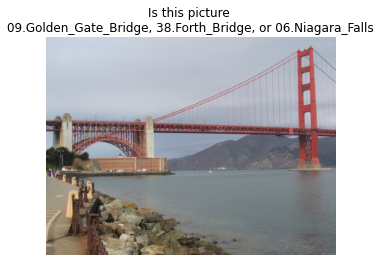

In [76]:
def suggest_locations(img_path):
    # get landmark predictions
    predicted_landmarks = predict_landmarks(img_path, 3)
    
    ## TODO: display image and display landmark predictions
    top_pred = predict_landmarks(img_path, 3)
    
    img = Image.open(img_path)
    plt.imshow(img)
    plt.title('Is this picture \n{}, {}, or {}'.format(top_pred[0], top_pred[1], top_pred[2]))
    plt.axis('off')
    plt.show()
    

# test on a sample image
suggest_locations('/content/drive/MyDrive/landmark_images/test/09.Golden_Gate_Bridge/190f3bae17c32c37.jpg')

### (IMPLEMENTATION) Test Your Algorithm

Test your algorithm by running the `suggest_locations` function on at least four images on your computer. Feel free to use any images you like.

__Question 4:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ I am satisfied with the predictions. 3 out of 5 images were correctly classified. The network needs to be improved by the following steps. 


1.   Augmenting the Training Images. ncrease the training. Here only training for 20 eopchs.

2.   Tuning of the hyperparameters (optimizer, learning rate)

3.   Try different settings for the model architecture (e.g. more layers, more hidden units)









In [ ]:
## TODO: Execute the `suggest_locations` function on
## at least 4 images on your computer.
## Feel free to use as many code cells as needed.



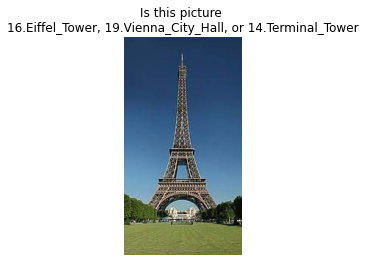

In [87]:
suggest_locations('/content/drive/MyDrive/Testing_Images/Eiffelturm.jfif')

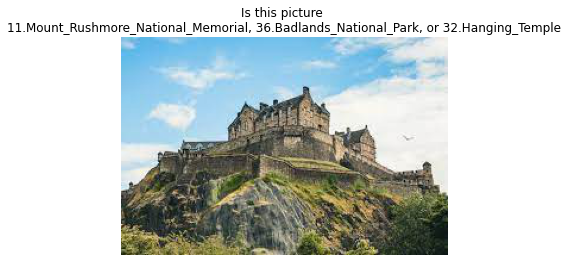

In [89]:
suggest_locations('/content/drive/MyDrive/Testing_Images/Edinburg_Castle.jfif')

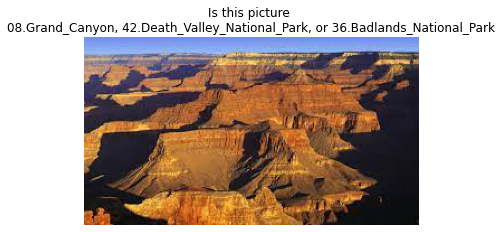

In [91]:
suggest_locations('/content/drive/MyDrive/Testing_Images/Grand_Canyon.jfif')

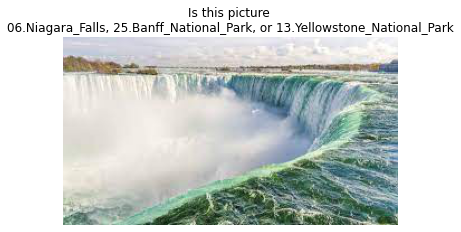

In [92]:
suggest_locations('/content/drive/MyDrive/Testing_Images/NiagaraFalls.jfif')

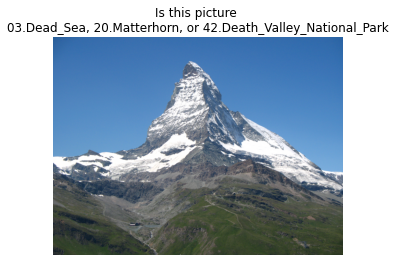

In [93]:
suggest_locations('/content/drive/MyDrive/Testing_Images/Matterhorn.jfif')